In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt 
import numpy as np 

Dataset Loading

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=10000)

In [3]:
X_train.shape

(25000,)

In [4]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")
print(f"Sample review (encoded): {X_train[0]}")
print(f"Sample label: {y_train[0]}")

Number of training samples: 25000
Number of test samples: 25000
Sample review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32

Visualizing  review lengths and label counts


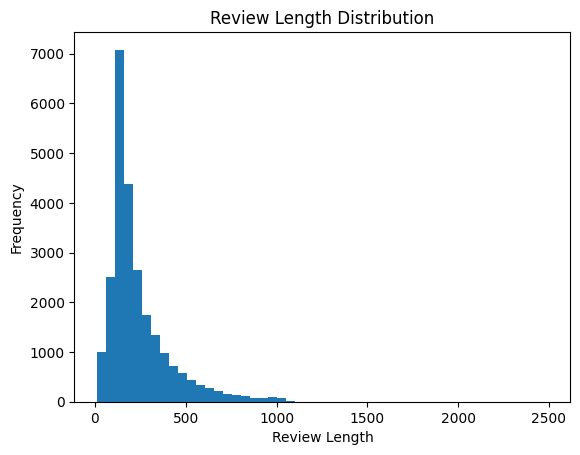

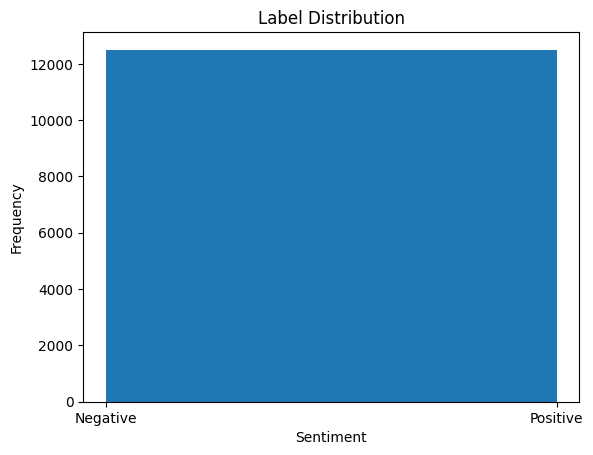

In [5]:
review_lengths = [len(review) for review in X_train]
plt.hist(review_lengths, bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

plt.hist(y_train, bins=2)
plt.title("Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.show()

Pad sequences to ensure uniform input size

In [6]:
max_length = 200
x_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

In [10]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "<UNK>") for i in encoded_review])

LSTM Model

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 64
model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training  the Model

In [17]:
epochs = 10  
batch_size = 64
history = model.fit(
    x_train_padded, y_train,
    validation_data=(x_test_padded, y_test),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9032 - loss: 0.2550 - val_accuracy: 0.8487 - val_loss: 0.3621
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9326 - loss: 0.1932 - val_accuracy: 0.8467 - val_loss: 0.3761
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9482 - loss: 0.1571 - val_accuracy: 0.8461 - val_loss: 0.4179
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9643 - loss: 0.1192 - val_accuracy: 0.8425 - val_loss: 0.4718
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9724 - loss: 0.0985 - val_accuracy: 0.8384 - val_loss: 0.5036
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9813 - loss: 0.0737 - val_accuracy: 0.8355 - val_loss: 0.5471
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9855 - loss: 0.0589 - val_accuracy: 0.8344 - val_loss: 0.5797
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9888 - loss: 0.0472 - 

Evaluation of the Model

In [18]:
from sklearn.metrics import classification_report

y_pred = (model.predict(x_test_padded) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83     12500
    Positive       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



learning curves

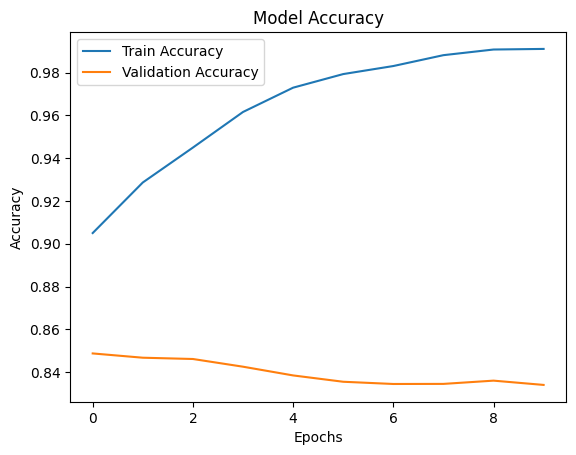

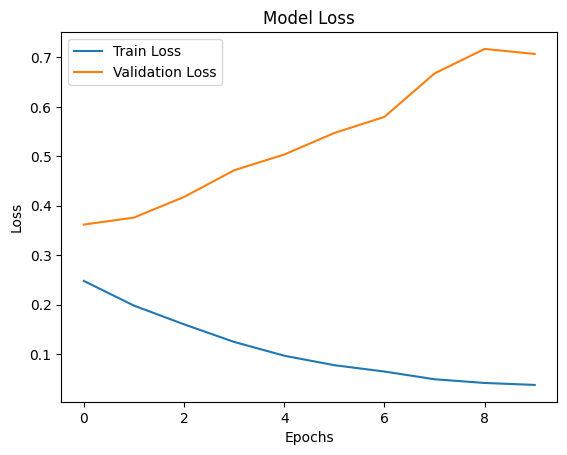

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Test the model on custom reviews

In [20]:
custom_reviews = [
    "The movie was fantastic! I loved it.",
    "The movie was terrible and boring."
]


def encode_review(review):
    tokens = review.lower().split()
    return [word_index.get(token, 2) + 3 for token in tokens]  # Offset by 3 for reserved indices

custom_reviews_encoded = [encode_review(review) for review in custom_reviews]
custom_reviews_padded = pad_sequences(custom_reviews_encoded, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(custom_reviews_padded)
for review, pred in zip(custom_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Review: The movie was fantastic! I loved it.
Predicted Sentiment: Positive

Review: The movie was terrible and boring.
Predicted Sentiment: Negative

